<a href="https://colab.research.google.com/github/rosemilca-Ing/Data-Analyst/blob/main/Analyze_with_Python/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analyst Project**

Prepared by : Rose-Milca CENAT

## **1. Définition du Problème**
L'objectif est d'analyser les performances des ventes d'une entreprise afin d'identifier :

Les produits les plus vendus.

La saisonnalité des ventes.

Quels sont les meilleurs mois pour les ventes ?

À quelle heure y a-t-il le plus de commandes ?

Quelle ville génère le plus de ventes ?

## **2. Collecte et Stockage des Données**
Données utilisées :
Données des ventes : Order ID, Sales, Quantity Ordered, price, etc.


Sources :
Kaggle

## **3. Transformation et Préparation des Données**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from itertools import combinations
from collections import Counter

In [30]:
data = pd.read_csv('Sales Data.csv')

In [31]:
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [32]:
#Suppression de la colonne Unnamed:0, elle n'est pas utile dans la dataframe
data.drop('Unnamed: 0', axis=1, inplace=True)

In [33]:
#Nombre de lignes et de colonnes
data.shape

(185950, 10)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Hour              185950 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 14.2+ MB


In [35]:
data.describe()

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [36]:
#Verifier valeurs nulles
print(data.isnull().sum())

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


In [37]:
#Voir les valeurs uniques
for col in data.columns:
    print(f"{col} - {data[col].nunique()} valeurs uniques")

Order ID - 178437 valeurs uniques
Product - 19 valeurs uniques
Quantity Ordered - 9 valeurs uniques
Price Each - 17 valeurs uniques
Order Date - 142395 valeurs uniques
Purchase Address - 140787 valeurs uniques
Month - 12 valeurs uniques
Sales - 53 valeurs uniques
City - 9 valeurs uniques
Hour - 24 valeurs uniques


In [38]:
#Convertir la colonne Order Date en datetime
data["Order Date"] = pd.to_datetime(data["Order Date"], errors='coerce')

In [39]:
#Verifier si des lignes de Order Date ont devenues NAT apres la conversion
print(data[data["Order Date"].isna()])

Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address, Month, Sales, City, Hour]
Index: []


In [40]:
#Verifier si la colonne Check Sales est correcte
data["Check Sales"] = data["Quantity Ordered"] * data["Price Each"]
data["Sales_correct"] = round(data["Check Sales"], 2) == round(data["Sales"], 2)

# Afficher les lignes où Sales est incorrect
print(data[data["Sales_correct"] == False])

Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address, Month, Sales, City, Hour, Check Sales, Sales_correct]
Index: []


In [41]:
data.drop("Sales_correct", axis=1, inplace=True)

In [42]:
data.drop("Check Sales", axis=1, inplace=True)

In [43]:
#Creation de nouvelles colonnes a des fins d'analyses
data["Day"] = data["Order Date"].dt.day
data["Weekday"] = data["Order Date"].dt.day_name()
data["Quarter"] = data["Order Date"].dt.quarter

In [44]:
# Compter le nombre de doublons (toutes les colonnes)
print(f"Nombre de doublons exacts : {data.duplicated().sum()}")

Nombre de doublons exacts : 264


In [45]:
print(f"Nombre de doublons sur 'Order ID' : {data.duplicated(subset=['Order ID']).sum()}")

Nombre de doublons sur 'Order ID' : 7513


In [46]:
#Affichage des doublons sur la colonne Order ID afin de determiner s'il est necessaires de les supprimer
#NB Si une commande contient plusieurs produits differents, l'orderId sera dupliquee
data[data.duplicated(subset=['Order ID'], keep=False)].sort_values(by=["Order ID"])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Day,Weekday,Quarter
136834,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,16,7,Monday,1
136835,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin,16,7,Monday,1
136850,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,8,2,Wednesday,1
136851,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles,8,2,Wednesday,1
136926,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,11,10,Thursday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24899,319584,iPhone,1,700.00,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",12,700.00,Portland,0,11,Wednesday,4
24912,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,700.00,New York City,8,1,Sunday,4
24913,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,14.95,New York City,8,1,Sunday,4
24949,319631,Lightning Charging Cable,1,14.95,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",12,14.95,Austin,22,17,Tuesday,4


In [47]:
#Supprimons toutes les lignes identiques
data.drop_duplicates(inplace=True)

In [48]:
data.shape

(185686, 13)

## **4. Analyse Exploratoire des Données (EDA)**

### **1. Quels sont les produits les plus vendus ?**

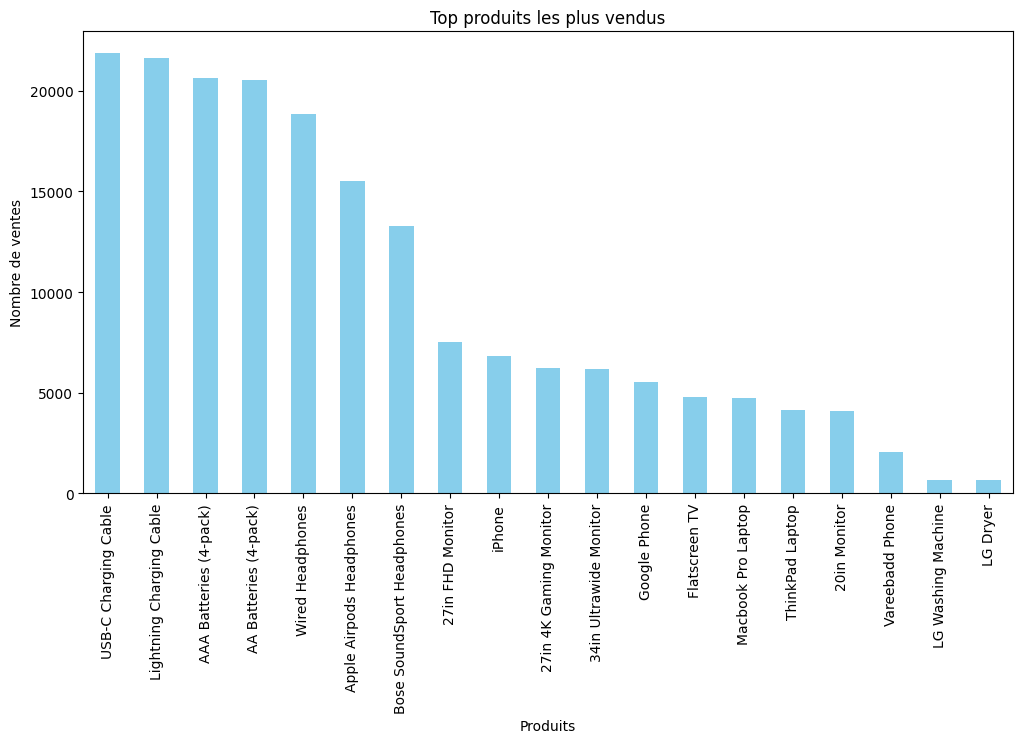

In [49]:
# Compter les ventes par produit
product_counts = data["Product"].value_counts()

# Visualiser avec un graphique
plt.figure(figsize=(12, 6))
product_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Produits")
plt.ylabel("Nombre de ventes")
plt.title("Top produits les plus vendus")
plt.xticks(rotation=90)
plt.show()

Les produits les plus vendus: USB-C Charging Cable, Lightning Charging Cable, AAA Batteries (4-pack).

### **2. Quels sont les meilleurs mois pour les ventes ?**

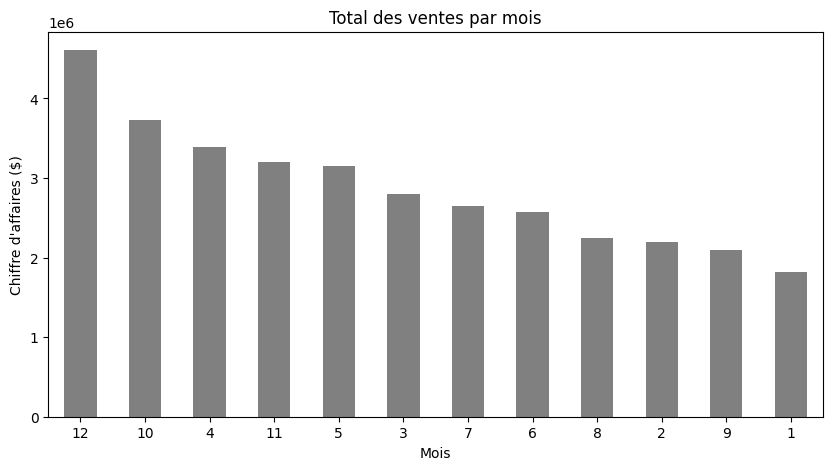

In [50]:
# Calcul des ventes par mois
sales_per_month = data.groupby("Month")["Sales"].sum().sort_values(ascending=False)

# Afficher sous forme de graphique
plt.figure(figsize=(10, 5))
sales_per_month.plot(kind="bar", color="gray")
plt.xlabel("Mois")
plt.ylabel("Chiffre d'affaires ($)")
plt.title("Total des ventes par mois")
plt.xticks(rotation=0)
plt.show()


Les meilleurs mois sont : Décembre, Octobre, Avril.

### **3. À quelle heure y a-t-il le plus de commandes ?**

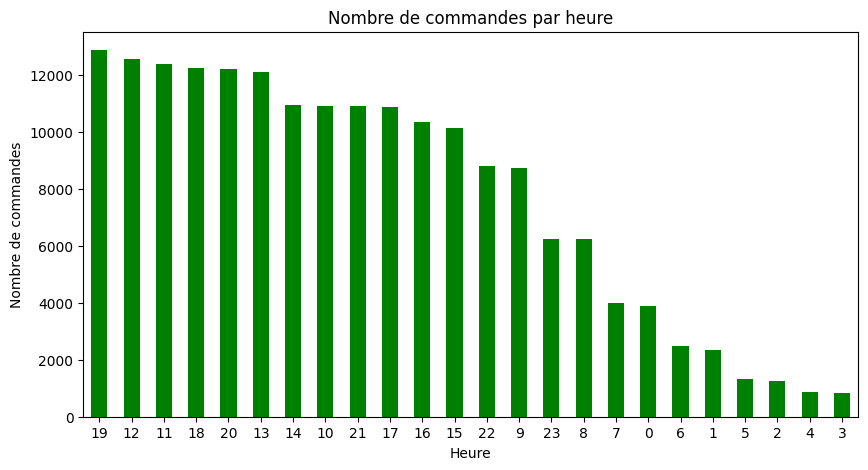

In [51]:
# Compter le nombre de commandes par heure
orders_per_hour = data["Hour"].value_counts().sort_values(ascending=False)

# Graphique des ventes par heure
plt.figure(figsize=(10, 5))
orders_per_hour.plot(kind="bar", color="green")
plt.xlabel("Heure")
plt.ylabel("Nombre de commandes")
plt.title("Nombre de commandes par heure")
plt.xticks(rotation=0)
plt.show()


Les heures où les clients achètent le plus: !9h, 12h, 11h, 18h, 20h.

### **4. Quelle ville génère le plus de ventes ?**

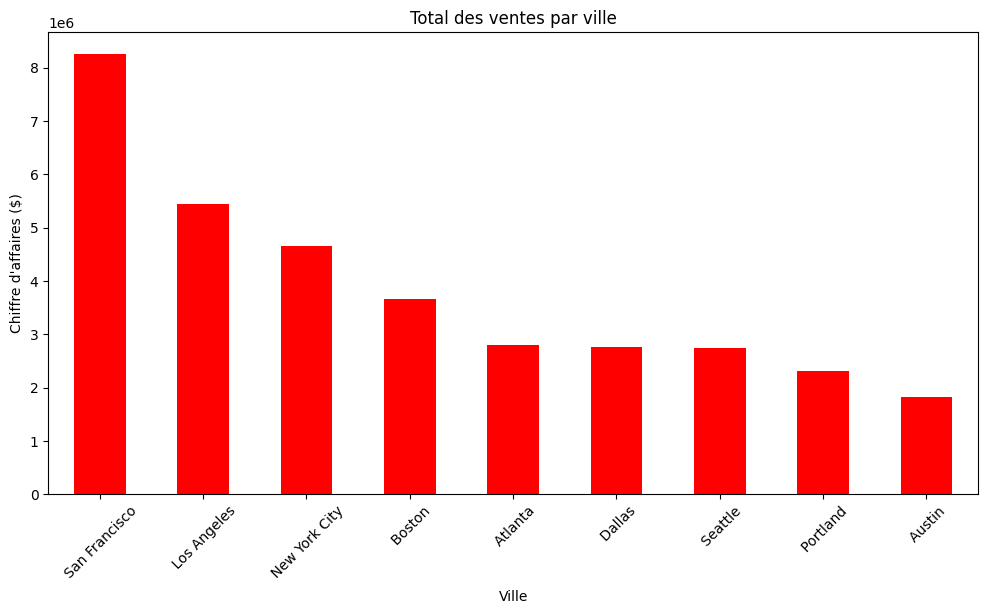

In [52]:
# Ventes par ville
sales_per_city = data.groupby("City")["Sales"].sum().sort_values(ascending=False)

# Graphique
plt.figure(figsize=(12, 6))
sales_per_city.plot(kind="bar", color="red")
plt.xlabel("Ville")
plt.ylabel("Chiffre d'affaires ($)")
plt.title("Total des ventes par ville")
plt.xticks(rotation=45)
plt.show()


Les villes que génèrent le plus de vente: San Francisco, Los Angeles, New York City.

### **5. Saison de vente : L’analyse de la saisonnalité des ventes**

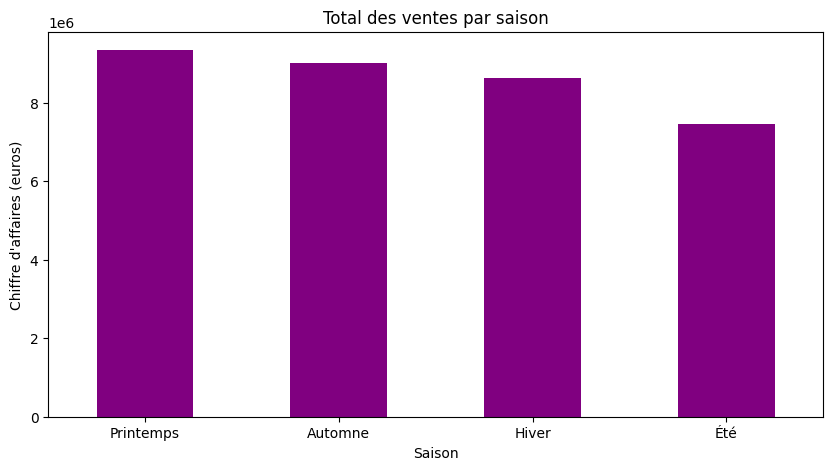

In [53]:
# Définir les saisons en fonction du mois
def get_season(month):
    if month in [12, 1, 2]:
        return "Hiver"
    elif month in [3, 4, 5]:
        return "Printemps"
    elif month in [6, 7, 8]:
        return "Été"
    else:
        return "Automne"

# Ajouter une colonne "Season"
data["Season"] = data["Month"].apply(get_season)

# Calcul des ventes par saison
sales_per_season = data.groupby("Season")["Sales"].sum().sort_values(ascending=False)

# Affichage des ventes par saison
sales_per_season.plot(kind="bar", color="purple", figsize=(10, 5))
plt.xlabel("Saison")
plt.ylabel("Chiffre d'affaires (euros)")
plt.title("Total des ventes par saison")
plt.xticks(rotation=0)
plt.show()


Meilleures saisons: Printemps, automne.

In [54]:
# Garder uniquement les commandes avec plusieurs produits
multi_order = data[data['Order ID'].duplicated(keep=False)]

# Regrouper les produits ensemble par Order ID
multi_order['Grouped'] = multi_order.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Supprimer les doublons
multi_order = multi_order[['Order ID', 'Grouped']].drop_duplicates()

# Compter les combinaisons de produits
count = Counter()

for row in multi_order['Grouped']:
    products = row.split(',')
    count.update(Counter(combinations(products, 2)))

<ipython-input-54-1076a3038966>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_order['Grouped'] = multi_order.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


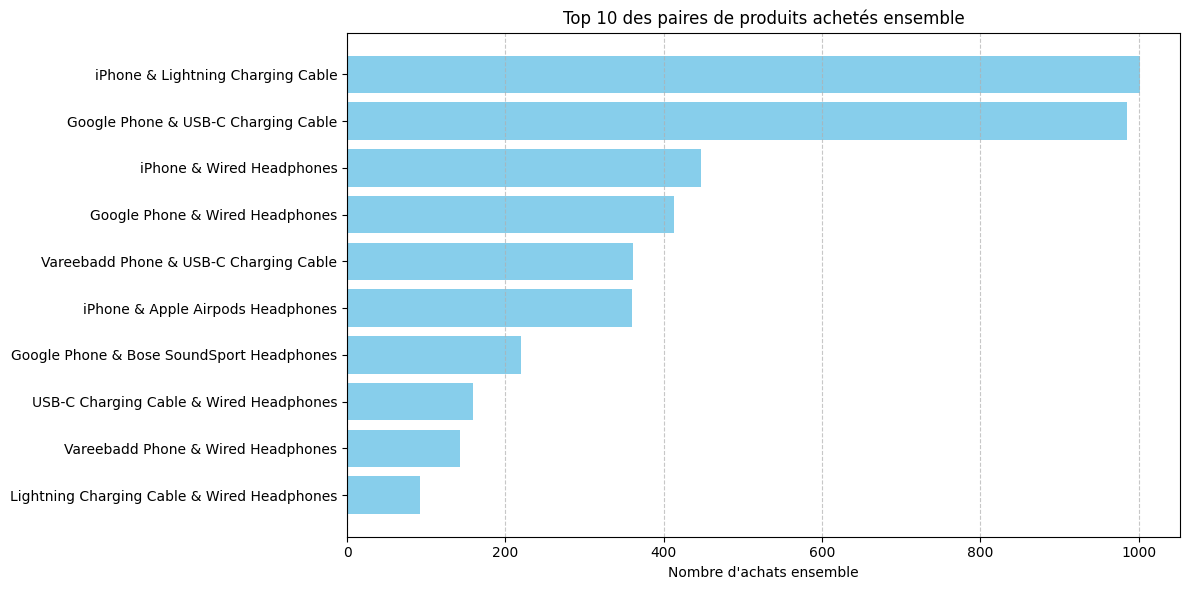

In [56]:
# Sélectionner les 10 paires les plus fréquentes
top_10 = count.most_common(10)

# Séparer les paires et leur nombre
pairs = [' & '.join(pair[0]) for pair in top_10]
counts = [pair[1] for pair in top_10]

# Créer un graphique
plt.figure(figsize=(12,6))
plt.barh(pairs, counts, color='skyblue')
plt.xlabel('Nombre d\'achats ensemble')
plt.title('Top 10 des paires de produits achetés ensemble')
plt.gca().invert_yaxis()  # Pour avoir la paire la plus fréquente en haut
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Rapport d'Analyse des Performances de Ventes**
**1. Objectif de l'analyse**

L'objectif de cette analyse est d'étudier les performances commerciales d'une entreprise afin d'identifier :
*   Les produits les plus populaires
*   Les tendances saisonnières
*   Les périodes horaires les plus actives
*   Les villes les plus rentables
*   Les meilleures saisons pour les ventes

**2. Résultats de l'analyse**

**2.1 Produits les plus vendus**
*   USB-C Charging Cable
*   Lightning Charging Cable
*   AAA Batteries (4-pack)

➡Ces produits représentent les articles avec le volume de ventes le plus élevé, principalement des accessoires technologiques et des consommables du quotidien.

**2.2 Meilleurs mois pour les ventes**
*   Décembre
*   Octobre
*   Avril

➡Le mois de décembre est logiquement en tête grâce aux achats de Noël. Octobre et Avril correspondent probablement à des périodes de promotions ou d'événements commerciaux.

**2.3 Heures où il y a le plus de commandes**
*   19h
*   12h
*   11h
*   18h
*   20h

➡ Les pics de commandes surviennent principalement en fin de journée et autour du déjeuner, ce qui suggère que les clients achètent pendant leurs temps libres.

**2.4 Villes générant le plus de ventes**
*   San Francisco
*   Los Angeles
*   New York City

➡ Ce sont toutes des grandes villes densément peuplées et économiquement dynamiques.

**2.5 Meilleures saisons pour les ventes**
*   Printemps
*   Automne

➡ L'activité commerciale est particulièrement forte pendant ces saisons, probablement en lien avec des événements saisonniers et des promotions.

## **Recommandations Stratégiques**
**1. Optimisation du Stock et Marketing**

•	Renforcer les stocks d'accessoires technologiques comme les câbles et les batteries avant Décembre, Octobre et Avril.

•	Lancer des campagnes marketing ciblées sur ces produits pendant ces périodes clés.

**2. Promotions ciblées**

•	Mener des offres flash autour de 11h-12h et 18h-20h, périodes de haute affluence client.

•	Utiliser des campagnes géolocalisées pour maximiser les ventes dans les villes performantes : San Francisco, Los Angeles, New York City.

**3. Préparation saisonnière**

•	Planifier les promotions majeures au printemps et en automne pour booster davantage les ventes.

•	Adapter les messages marketing aux événements saisonniers pour capter l’attention des clients.

**4. Développement de nouveaux produits**

•	Explorer la gamme d'accessoires technologiques, car les accessoires à usage quotidien (câbles, batteries) génèrent déjà un volume important.


**5. Recommandations Business après l'analyse**

•	Créer des bundles officiels sur les paires les plus populaires.

•	Faire des promotions croisées.

•	Mettre en avant ces produits ensemble sur le site ou en magasin.